<a href="https://colab.research.google.com/github/shashwatdixit10/Fraud-Detection-ML/blob/main/ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [9]:
data = pd.read_csv('//content/drive/MyDrive/data/Fraud Analytics Dataset.csv')

In [10]:
import numpy as np

In [11]:
data.head()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,...,remitter_mcc_code,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),...,6051,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night,NaN
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),...,5966,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night,NaN
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,...,5047,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night,NaN
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,...,822,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night,NaN
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),...,5978,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night,NaN


In [12]:
data['txn_subtype'].value_counts()

txn_subtype
Service Refund                  3675
Inter-bank Transfer             3672
Merchant Payment                3648
Bill Payment                    3612
Product Refund                  3603
Fraudulent Transaction          3585
Peer-to-Peer (P2P)              3546
Intra-bank Transfer             3546
Account Maintenance Fee         3537
ATM Withdrawal                  3510
Transaction Fee                 3507
Cash Deposit                    3486
Transaction Error Correction    3468
Cheque Deposit                  3420
Branch Withdrawal               3375
International Transfer          2481
Name: count, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55671 entries, 0 to 55670
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   txn_id                   55671 non-null  int64  
 1   dt_txn_comp              55671 non-null  object 
 2   txn_comp_time            55671 non-null  object 
 3   txn_type                 55671 non-null  object 
 4   txn_subtype              55671 non-null  object 
 5   initiating_channel_id    55671 non-null  int64  
 6   txn_status               55671 non-null  object 
 7   error_code               4903 non-null   object 
 8   payer_psp                55671 non-null  object 
 9   payee_psp                55671 non-null  object 
 10  remitter_bank            55671 non-null  object 
 11  beneficiary_bank         55671 non-null  object 
 12  payer_handle             55671 non-null  object 
 13  payer_app                55671 non-null  object 
 14  payee_handle          

In [14]:
data.isnull().sum()

txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [15]:
data.shape

(55671, 37)

In [16]:
missing_values = data.isnull().sum()

In [17]:
print(missing_values)


txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [18]:
if '@dropdown' in data.columns:                                           #this is how we drop columns
    data.drop(columns=['@dropdown'], inplace=True)

In [19]:
missing_values = data.isnull().sum()

In [20]:
print(missing_values)


txn_id                         0
dt_txn_comp                    0
txn_comp_time                  0
txn_type                       0
txn_subtype                    0
initiating_channel_id          0
txn_status                     0
error_code                 50768
payer_psp                      0
payee_psp                      0
remitter_bank                  0
beneficiary_bank               0
payer_handle                   0
payer_app                      0
payee_handle                   0
payee_app                      0
payee_requested_amount         0
payee_settlement_amount        0
payer_location                 0
payer_city                     0
payer_state                    0
payee_location                 0
payee_city                     0
payee_state                    0
payer_os_type                  0
payee_os_type                  0
beneficiary_mcc_code           0
remitter_mcc_code              0
custref_transaction_ref        0
cred_type                      0
cred_subty

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
subtype_counts = data['txn_subtype'].value_counts()

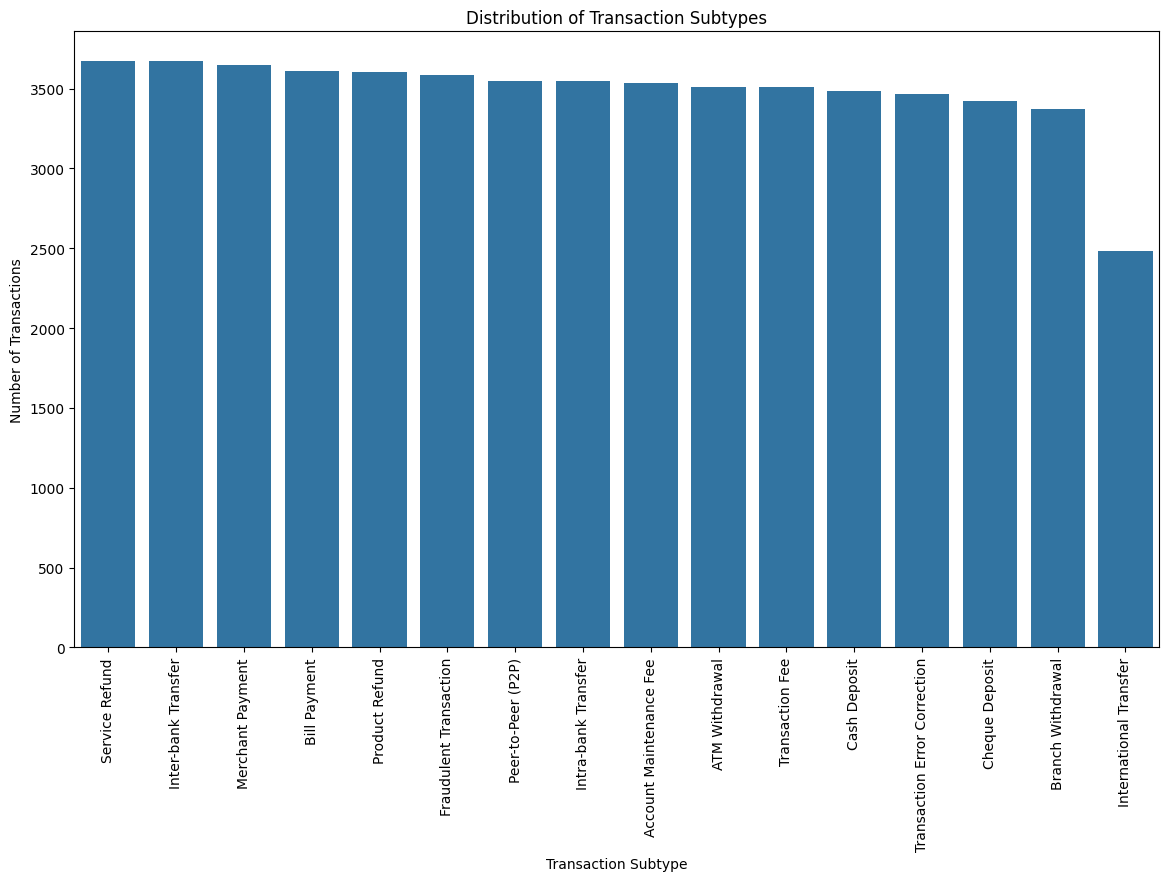

In [31]:
plt.figure(figsize=(14, 8))
sns.barplot(x=subtype_counts.index, y=subtype_counts.values)
plt.xlabel('Transaction Subtype')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Subtypes')
plt.xticks(rotation=90)
plt.show()

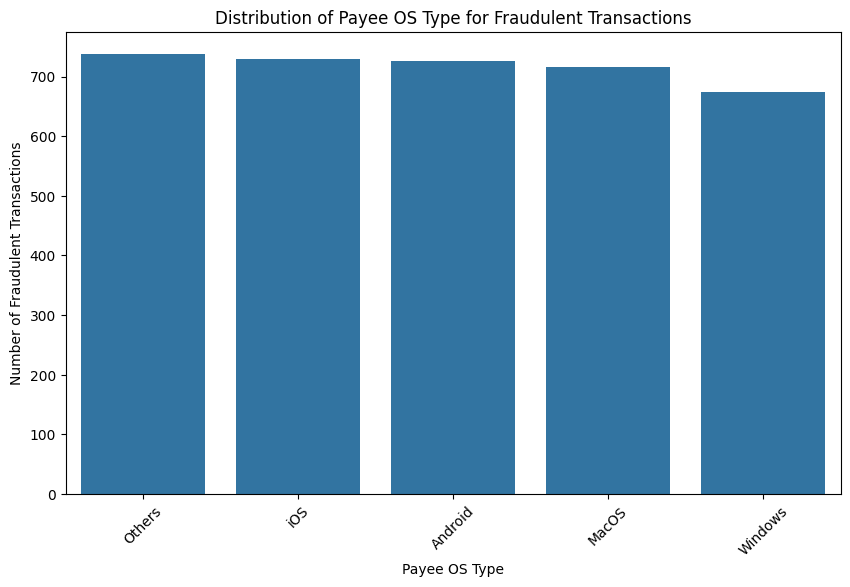

In [33]:
fraud_labels = ['Fraudulent Transaction']
data['is_fraud'] = data['txn_subtype'].apply(lambda x: 1 if x in fraud_labels else 0)

fraud_data = data[data['is_fraud'] == 1]

payee_os_counts = fraud_data['payee_os_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payee_os_counts.index, y=payee_os_counts.values)
plt.xlabel('Payee OS Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Payee OS Type for Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()